# **Model Building**

## **1.Convolutional Neural Netwok (CNN)**

#### *Import Packages & Libraries* 

In [13]:
#import the necessary libraries 
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator as idm

In [14]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### *Mounting Google Drive*

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### *Importing the Image_dataset*

In [ ]:
pwd

'/content/drive/MyDrive/IBM Dataset'

In [ ]:
ls

'Copy of training_set.zip'                     test_set/
 Cyclone_Wildfire_Flood_Earthquake_Database/


In [ ]:
cd /content/drive/MyDrive/IBM_DATASET/

/content/drive/MyDrive/IBM_DATASET


In [ ]:
ls

training_set.zip


In [ ]:
!unzip training_set.zip

Archive:  training_set.zip
   creating: Cyclone_Wildfire_Flood_Earthquake_Database/
   creating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/0.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/1.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/10.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/100.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/101.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/102.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/103.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/104.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/105.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/106.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/107.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthq

#### *Configuring train_datagen and test_datagen*

In [15]:
#Configure train_datagen
train_datagen = idm(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)

In [16]:
#Configure test_datagen
test_datagen = idm(rescale=1./255)

#### *Apply the configured imagedatagenerator to trainset and testset*

In [17]:
Xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM_DATASET/train_set',target_size=(76,76), batch_size=100,class_mode='categorical', color_mode = "rgb")

Found 3402 images belonging to 3 classes.


In [18]:
Xtest = test_datagen.flow_from_directory('/content/drive/MyDrive/IBM_DATASET/test_set',target_size=(76,76), batch_size=100,class_mode='categorical', color_mode = "rgb")

Found 155 images belonging to 3 classes.


#### *Display Class indices of trainset and testset*

In [19]:
Xtrain.class_indices

{'Cyclone': 0, 'Earthquake': 1, 'Flood': 2}

In [20]:
Xtest.class_indices

{'Cyclone': 0, 'Earthquaqe': 1, 'Flood': 2}

#### *Create model*

In [83]:
#Defining model
model=Sequential()

#### *Build and configure model*

In [84]:
#Convolution Layer 1
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#Convolution Layer 2
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#Convolution Layer 3
model.add(Convolution2D(64,(3,3),activation='relu',input_shape=(76,76,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#Convolution Layer 4
model.add(Convolution2D(64,(3,3),activation='relu',input_shape=(76,76,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(3,activation='softmax'))

#### *Model Summary*

In [85]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 35, 35, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 64)        

#### *Compiling the model*

In [86]:
#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#### *Training the model*

In [87]:
#Model fitting - training and validation
history = model.fit_generator(Xtrain, steps_per_epoch= len(Xtrain), epochs=15, validation_data=Xtest, validation_steps= len(Xtest))

Epoch 1/15
35/35 [==============================] - 144s 4s/step - loss: 0.9885 - accuracy: 0.4835 - val_loss: 0.8942 - val_accuracy: 0.5806
Epoch 2/15
35/35 [==============================] - 128s 4s/step - loss: 0.7582 - accuracy: 0.6337 - val_loss: 0.8916 - val_accuracy: 0.6000
Epoch 3/15
35/35 [==============================] - 131s 4s/step - loss: 0.6990 - accuracy: 0.6578 - val_loss: 0.6299 - val_accuracy: 0.6710
Epoch 4/15
35/35 [==============================] - 129s 4s/step - loss: 0.6197 - accuracy: 0.7175 - val_loss: 0.6409 - val_accuracy: 0.7548
Epoch 5/15
35/35 [==============================] - 135s 4s/step - loss: 0.5430 - accuracy: 0.7698 - val_loss: 1.0394 - val_accuracy: 0.5484
Epoch 6/15
35/35 [==============================] - 133s 4s/step - loss: 0.5848 - accuracy: 0.7537 - val_loss: 0.7078 - val_accuracy: 0.7677
Epoch 7/15
35/35 [==============================] - 128s 4s/step - loss: 0.4550 - accuracy: 0.8128 - val_loss: 0.4577 - val_accuracy: 0.7677
Epoch 8/15
35

#### *Testing the model*

In [88]:
from tensorflow.keras.preprocessing import image

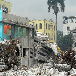

In [89]:
test_img=image.load_img('/content/drive/MyDrive/IBM_DATASET/test_set/Earthquaqe/Copy of 22.jpg',target_size=(76,76))
test_img

In [90]:
x=image.img_to_array(test_img)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(model.predict(x))
Prediction_category=['Cyclone','Earthquake','Flood']
Prediction_category[predicted]

1/1 [==============================] - 0s 193ms/step


'Earthquake'

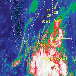

In [91]:
test_img1=image.load_img('/content/drive/MyDrive/IBM_DATASET/train_set/Cyclone/1.jpg',target_size=(76,76))
test_img1

In [92]:
x=image.img_to_array(test_img1)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(model.predict(x))
Prediction_category=['Cyclone','Earthquake','Flood']
Prediction_category[predicted]

1/1 [==============================] - 0s 39ms/step


'Cyclone'

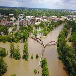

In [93]:
test_img2=image.load_img('/content/drive/MyDrive/IBM_DATASET/train_set/Flood/11.jpg',target_size=(76,76))
test_img2

In [94]:
x=image.img_to_array(test_img2)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(model.predict(x))
Prediction_category=['Cyclone','Earthquake','Flood']
Prediction_category[predicted]

1/1 [==============================] - 0s 35ms/step


'Flood'

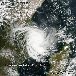

In [95]:
test_img3=image.load_img('/content/drive/MyDrive/IBM_DATASET/train_set/Cyclone/123.jpg',target_size=(76,76))
test_img3

In [96]:
x=image.img_to_array(test_img3)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(model.predict(x))
Prediction_category=['Cyclone','Earthquake','Flood']
Prediction_category[predicted]

1/1 [==============================] - 0s 44ms/step


'Cyclone'

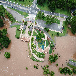

In [97]:
test_img4=image.load_img('/content/drive/MyDrive/IBM_DATASET/train_set/Flood/404.jpg',target_size=(76,76))
test_img4

In [98]:
x=image.img_to_array(test_img4)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(model.predict(x))
Prediction_category=['Cyclone','Earthquake','Flood']
Prediction_category[predicted]

1/1 [==============================] - 0s 23ms/step


'Flood'

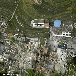

In [99]:
test_img5=image.load_img('/content/drive/MyDrive/IBM_DATASET/train_set/Earthquake/1111.jpg',target_size=(76,76))
test_img5

In [100]:
x=image.img_to_array(test_img5)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(model.predict(x))
Prediction_category=['Cyclone','Earthquake','Flood']
Prediction_category[predicted]

1/1 [==============================] - 0s 25ms/step


'Earthquake'

#### *Saving the model*

In [101]:
#saving the Model
model.save('CNN_Model_for_Disaster_Classification.h5')

#### *Plotting Accuracy Graph*





In [102]:
#importing dependencies to plot the graph
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

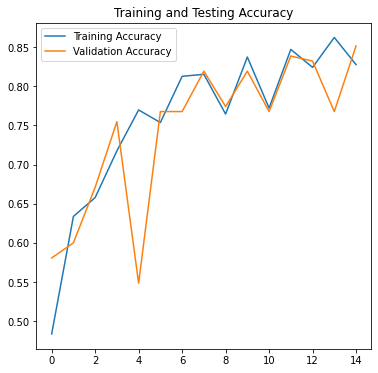

In [105]:
#Training and Validation Accuracy Plots
epochs_range = range(15)

plt.figure(figsize=(6,6))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy')
plt.show()

#### *Plotting Loss Graph*


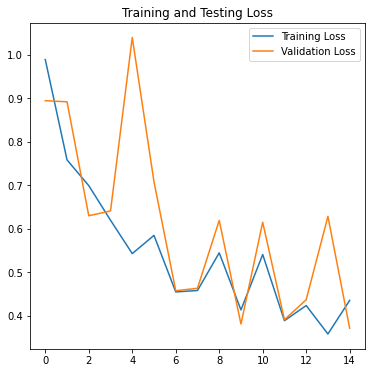

In [106]:
#Training and Validation Loss Plot
plt.figure(figsize=(6,6))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Testing Loss')
plt.show()

#### *Confusion Matrix*

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(Xtest,500 // 100)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Xtest.classes, y_pred))

Confusion Matrix
[[20 22 13]
 [16 22 12]
 [16 14 20]]


#### *Classification Report*

In [111]:
print('Classification Report')
target_names = ['Cyclone', 'Earthquake', 'Flood']
print(classification_report(Xtest.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     Cyclone       0.38      0.36      0.37        55
  Earthquake       0.38      0.44      0.41        50
       Flood       0.44      0.40      0.42        50

    accuracy                           0.40       155
   macro avg       0.40      0.40      0.40       155
weighted avg       0.40      0.40      0.40       155

